In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the dataset

In [3]:
df = pd.read_csv('./students_mental_health_survey.csv')
df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


## 2. Data Cleaning

#### 2.1. Impute Missing Values
* `CGPA` has 12 missing values
* `Substance_Use` has 15 missing values

In [4]:
df.isnull().sum(), df.dtypes

(Age                             0
 Course                          0
 Gender                          0
 CGPA                           12
 Stress_Level                    0
 Depression_Score                0
 Anxiety_Score                   0
 Sleep_Quality                   0
 Physical_Activity               0
 Diet_Quality                    0
 Social_Support                  0
 Relationship_Status             0
 Substance_Use                  15
 Counseling_Service_Use          0
 Family_History                  0
 Chronic_Illness                 0
 Financial_Stress                0
 Extracurricular_Involvement     0
 Semester_Credit_Load            0
 Residence_Type                  0
 dtype: int64,
 Age                              int64
 Course                          object
 Gender                          object
 CGPA                           float64
 Stress_Level                     int64
 Depression_Score                 int64
 Anxiety_Score                    int64
 Slee

In [5]:
df['CGPA'].fillna(df['CGPA'].median(), inplace=True)
df['Substance_Use'].fillna(df['Substance_Use'].mode()[0], inplace=True)

/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_90650/1620491410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CGPA'].fillna(df['CGPA'].median(), inplace=True)
/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_90650/1620491410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [6]:
df.isnull().sum()

Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64

#### 2.2. Features Classification (Categorical & Numerical)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7022 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7022 non-null   object 
 13  Counseling_Service

In [8]:
cat_cols = df.select_dtypes('object').columns
cat_cols_summary = {col:df[col].unique() for col in cat_cols}
cat_cols_summary

{'Course': array(['Others', 'Engineering', 'Business', 'Computer Science', 'Medical',
        'Law'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Sleep_Quality': array(['Good', 'Average', 'Poor'], dtype=object),
 'Physical_Activity': array(['Moderate', 'Low', 'High'], dtype=object),
 'Diet_Quality': array(['Good', 'Average', 'Poor'], dtype=object),
 'Social_Support': array(['Moderate', 'Low', 'High'], dtype=object),
 'Relationship_Status': array(['Married', 'Single', 'In a Relationship'], dtype=object),
 'Substance_Use': array(['Never', 'Occasionally', 'Frequently'], dtype=object),
 'Counseling_Service_Use': array(['Never', 'Occasionally', 'Frequently'], dtype=object),
 'Family_History': array(['No', 'Yes'], dtype=object),
 'Chronic_Illness': array(['No', 'Yes'], dtype=object),
 'Extracurricular_Involvement': array(['Moderate', 'Low', 'High'], dtype=object),
 'Residence_Type': array(['On-Campus', 'Off-Campus', 'With Family'], dtype=object)}

In [9]:
cat_features = list(df.select_dtypes('object').columns)
num_features = list(df.select_dtypes(['float64','int64']).columns)

In [10]:
cat_features, num_features

(['Course',
  'Gender',
  'Sleep_Quality',
  'Physical_Activity',
  'Diet_Quality',
  'Social_Support',
  'Relationship_Status',
  'Substance_Use',
  'Counseling_Service_Use',
  'Family_History',
  'Chronic_Illness',
  'Extracurricular_Involvement',
  'Residence_Type'],
 ['Age',
  'CGPA',
  'Stress_Level',
  'Depression_Score',
  'Anxiety_Score',
  'Financial_Stress',
  'Semester_Credit_Load'])

In [11]:
def convert_cat(df, cat_features):
    for feature in cat_features:
        df[feature] = df[feature].astype('category')
convert_cat(df,cat_features)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          7022 non-null   int64   
 1   Course                       7022 non-null   category
 2   Gender                       7022 non-null   category
 3   CGPA                         7022 non-null   float64 
 4   Stress_Level                 7022 non-null   int64   
 5   Depression_Score             7022 non-null   int64   
 6   Anxiety_Score                7022 non-null   int64   
 7   Sleep_Quality                7022 non-null   category
 8   Physical_Activity            7022 non-null   category
 9   Diet_Quality                 7022 non-null   category
 10  Social_Support               7022 non-null   category
 11  Relationship_Status          7022 non-null   category
 12  Substance_Use                7022 non-null   category
 13  Cou

In [13]:
df.describe(include=['category'])

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
count,7022,7022,7022,7022,7022,7022,7022,7022,7022,7022,7022,7022,7022
unique,6,2,3,3,3,3,3,3,3,2,2,3,3
top,Medical,Male,Good,Moderate,Average,Moderate,Single,Never,Never,No,No,Moderate,On-Campus
freq,2105,3547,3589,3521,4268,3470,3574,5918,4263,4866,6678,3440,2815


In [14]:
df.describe()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000
mean,23.003418,3.491285,2.427941,2.254486,2.300484,2.453005,22.010538
std,3.853978,0.287175,1.638408,1.625193,1.624305,1.708995,4.358380
min,18.000000,2.440000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20.000000,3.290000,1.000000,1.000000,1.000000,1.000000,18.000000
50%,22.000000,3.500000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,25.000000,3.700000,4.000000,3.000000,4.000000,4.000000,26.000000
max,35.000000,4.000000,5.000000,5.000000,5.000000,5.000000,29.000000


#### Observations:
* Hầu hết các sinh viên có độ tuổi từ 18-25 tuổi, với CGPA trung bình là 3.49
* `Sleep_Quality` phổ biến nhất là 'Good', `Physical_Activity` phổ biến nhất là 'Moderate'
* Phần lớn sinh viên đều 'No' lịch sử gia đình mắc bệnh tâm lí và sử dụng chất kích thích
* `Substance_Use` chủ yếu là 'Never'

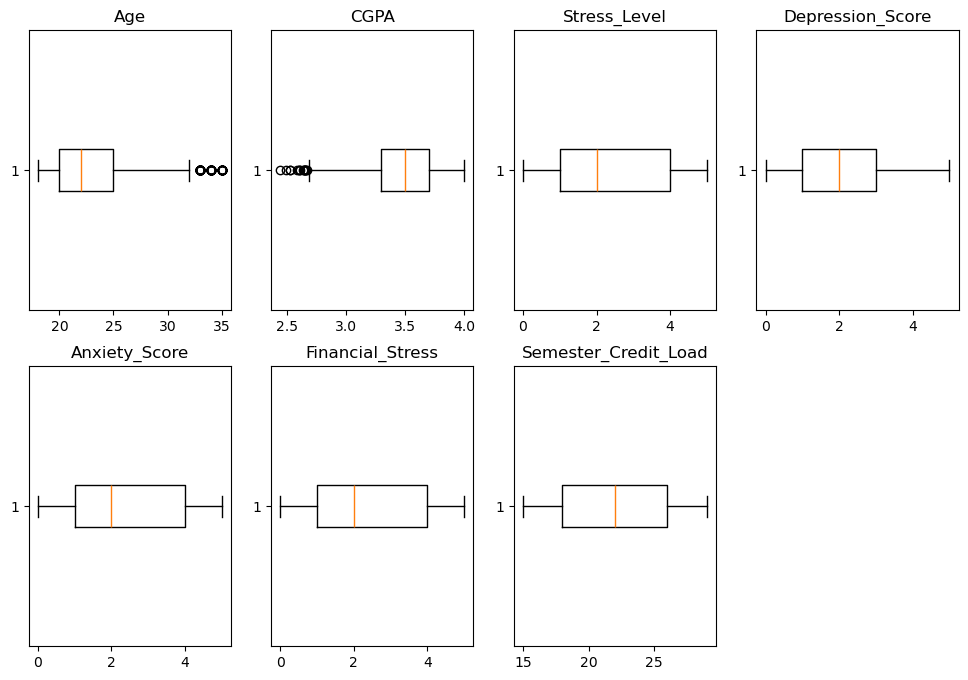

In [15]:
plt.figure(figsize=(12,8))
for i, feature in enumerate(num_features,1): #subplot đánh từ 1 trở lên
    plt.subplot(2,4,i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'{feature}')

#### Key Observations:
* `Age`: hầu hết sinh viên nằm ở độ tuổi tương đối hẹp, có 1 vài ngoại lệ sinh viên lớn tuổi hơn đa số
* `CGPA`: phân phối xuất hiện hơi lệch về giá trị CGPA cao hơn
* `Stress_Level`, `Depression_Score`, `Anxiety_Score`, `Financial_Stress`, `Semester_Credit_Load`: phân phối tốt, không có ngoại lệ

#### Implications:
* Cần xử lí các ngoại lệ của `Age` và `CGPA` (sinh viên lớn tuổi và sinh viên có điểm thấp)
* `Stress_Level`, `Depression_Score`, `Anxiety_Score`, `Financial_Stress` không có ngoại lệ cho thấy dữ liệu đáng tin cậy

In [16]:
outliers_summary = {}
outliers_cols = ['Age','CGPA']
for col in outliers_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    outliers = df[(df[col]<lower_bound) | (df[col]>upper_bound)]
    outliers_summary[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outliers),
        'outliers_values': outliers[col].unique()
    }
outliers_summary

{'Age': {'lower_bound': 12.5,
  'upper_bound': 32.5,
  'outliers_count': 131,
  'outliers_values': array([35, 34, 33])},
 'CGPA': {'lower_bound': 2.675,
  'upper_bound': 4.315,
  'outliers_count': 16,
  'outliers_values': array([2.44, 2.64, 2.65, 2.6 , 2.58, 2.52, 2.61, 2.66, 2.63, 2.49, 2.67])}}

* 1. `Age`
     * lower_bound: 12.5
     * upper_bound: 32.5
     * ouliers: 131 instances with values [33,34,35]
* 2. `CGPA`
     * lower_bound: 2.675
     * upper_bound: 4.315
     * ouliers: 16 instances with around the lower bound (2.44,2.67)

## 3. Exploratory Data Analysis
#### 3.1. Univariate Analysis

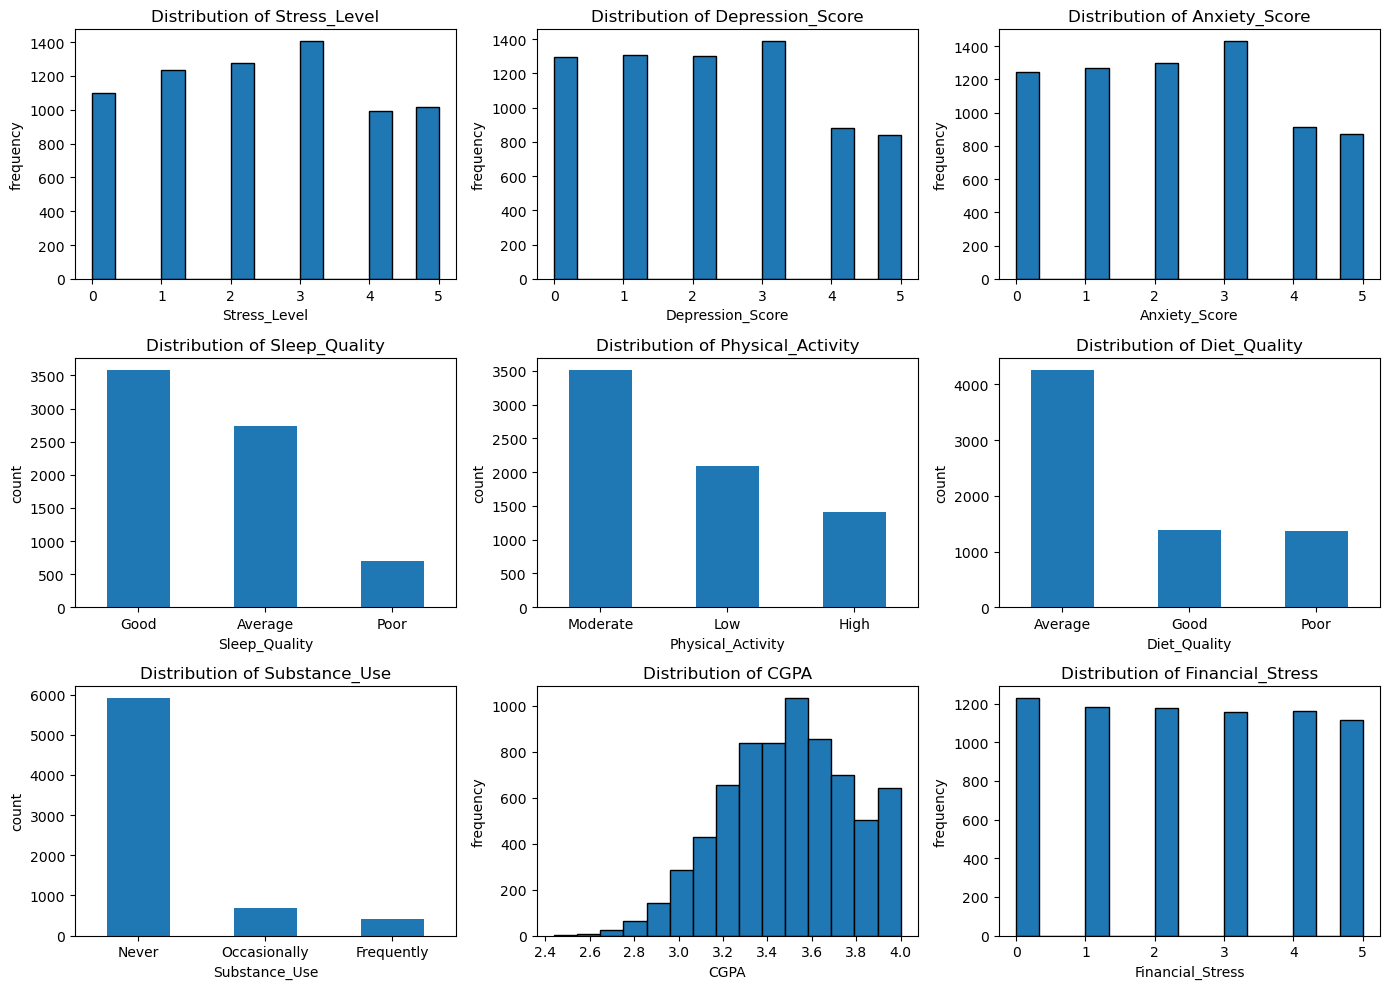

In [17]:
key_variables = ['Stress_Level','Depression_Score','Anxiety_Score',
                'Sleep_Quality','Physical_Activity','Diet_Quality','Substance_Use',
                'CGPA','Financial_Stress']

plt.figure(figsize=(14,10))
for i, col in enumerate(key_variables,1):
    plt.subplot(3,3,i)
    if df[col].dtypes == 'category':
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('count')
        plt.xticks(rotation=0)
    else:
        df[col].plot(kind='hist', bins=15, edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('frequency')
plt.tight_layout()

* `Stress_Level`, `Depression_Score`, `Anxiety_Score`: phân bố khá rộng, có xu hướng tụ lại ở mức trung bình
* `Sleep_Quality`, `Physical_Activity`, `Diet_Quality`: các yếu tố lối sống có phân bố không đều ở các nhóm
    * 'Good' Sleep Quality is the most common
    * 'Moderate' Physical_Activity is the most common
    * 'Never' Substance_Use is the most common
* `CGPA`: giá trị trung tâm quanh 3.5 là phổ biến
* `Financial_Stress`: phân phối trải đều

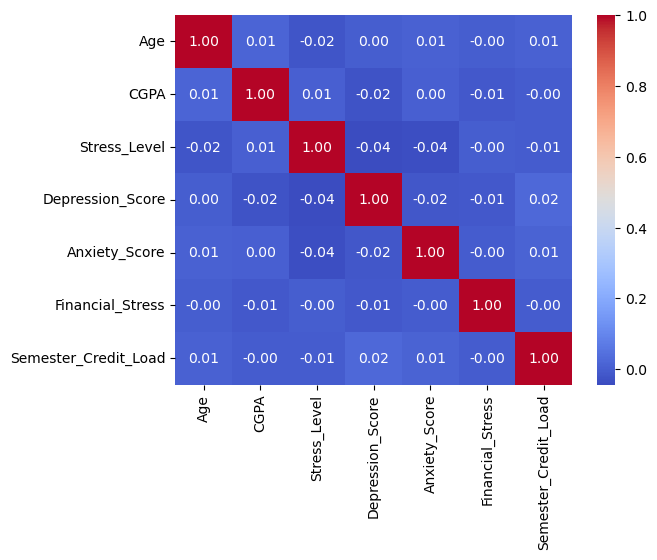

In [18]:
cor_matrix = df.select_dtypes(['float64','int64']).corr()
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f');

* Không có mối tương quan đáng kể giữa các chỉ số tinh thần và các yếu tố học tập cũng như tài chính

## 4. Predict Modeling Framework
#### 4.1 Define the Target variable
* Target: `Stress_Level`
* Convert `Stress_Level` into binary classification
    * 0: `Low Stress` (values <= 2)
    * 1: `High Stress` (values > 2)
#### 4.2. Encode Categorical Data

In [19]:
y = df['Stress_Level']
selected_cols = ['Age','Course','CGPA','Semester_Credit_Load',
                 'Depression_Score','Anxiety_Score','Financial_Stress']
X = df[selected_cols]

In [20]:
y = (y>2).astype('int')
y

0       1
1       0
2       1
3       0
4       1
       ..
7017    1
7018    1
7019    1
7020    1
7021    1
Name: Stress_Level, Length: 7022, dtype: int64

In [21]:
X = pd.get_dummies(X, drop_first=True)
X

,Age,CGPA,Semester_Credit_Load,Depression_Score,Anxiety_Score,Financial_Stress,Course_Computer Science,Course_Engineering,Course_Law,Course_Medical,Course_Others
0,25,3.56,17,3,2,2,False,False,False,False,True
1,24,2.44,27,3,0,3,False,True,False,False,False
2,19,3.74,15,0,3,4,False,False,False,False,False
3,19,3.65,20,1,0,4,True,False,False,False,False
4,18,3.40,23,3,4,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7017,20,3.69,26,1,5,1,False,False,True,False,False
7018,24,3.73,15,4,1,3,False,False,False,True,False
7019,26,3.65,17,5,1,4,False,False,False,False,True
7020,24,3.65,18,3,4,4,False,False,False,True,False


/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_90650/219351462.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.51809444  0.25860377 -1.03884956 ...  0.77758511  0.25860377
 -0.26037756]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:,:6] = sc_model.fit_transform(X.iloc[:,:6])
/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_90650/219351462.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.14971514  1.14487891 -1.60863395 ... -1.14971514 -0.92025573
 -1.14971514]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:,:6] = sc_model.fit_transform(X.iloc[:,:6])
/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_90650/219351462.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will rai

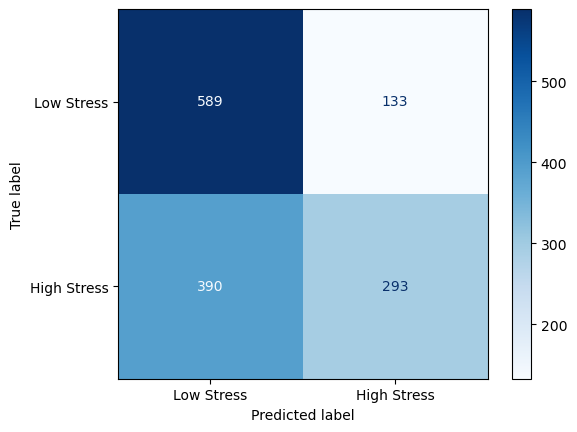

              precision    recall  f1-score   support

           0       0.60      0.82      0.69       722
           1       0.69      0.43      0.53       683

    accuracy                           0.63      1405
   macro avg       0.64      0.62      0.61      1405
weighted avg       0.64      0.63      0.61      1405



In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

sc_model = StandardScaler()
X.iloc[:,:6] = sc_model.fit_transform(X.iloc[:,:6])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Low Stress','High Stress'])
disp.plot(cmap='Blues')
plt.show()
print(classification_report(y_test,y_pred))


In [23]:
import joblib
# Giả sử mô hình của bạn là biến `model`
joblib.dump(lr_model, 'mental_health_model.pkl')


['mental_health_model.pkl']